<a href="https://colab.research.google.com/github/nsk31512/terver/blob/hometask2/%D0%A2%D0%B5%D1%80%D0%B2%D0%B5%D1%80_%D0%94%D0%B72_%D0%B8%D1%81%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def combination(n, k):
  #функция Сочетания

  A_n_k = np.math.factorial(n)
  P_k = np.math.factorial(k)*np.math.factorial(n-k)
  return A_n_k//P_k  

Принимаемые значения случайной величины $x_1=0, x_2=1, x_3=2, x_4=3, x_5=4, x_6=5$

In [3]:
x_list = np.array([el for el in range(6)])
#Рассчитаем вероятности дать правильный ответ и сведем ответы в словарь
probabilities = []
for i in x_list:
  P_i = combination(5, i)*(1/4 ** i) * ((1-1/4)**(5 - i))
  probabilities.append(P_i)
probabilities = np.array(probabilities)
probabilities

array([0.23730469, 0.39550781, 0.26367188, 0.08789062, 0.01464844,
       0.00097656])

In [4]:
#Рассчитаем мат.ожидание
M_X = (x_list * probabilities).sum()
M_X

1.25

In [5]:
M_X = 1.25

рассчитаем дисперсию

In [6]:
y_values = x_list - M_X
y_values

array([-1.25, -0.25,  0.75,  1.75,  2.75,  3.75])

In [7]:
z_values = y_values ** 2
z_values

array([ 1.5625,  0.0625,  0.5625,  3.0625,  7.5625, 14.0625])

In [8]:
D_X = (z_values * probabilities).sum()
D_X

0.9375

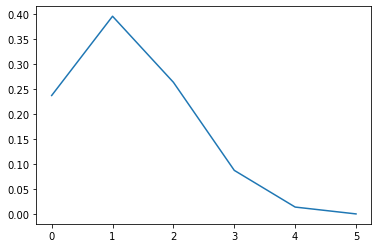

In [9]:
plt.plot(probabilities)

# Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [10]:
def poisson_proba(k: int, lambda_: float):
  return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)


In [11]:
#Применим формулу Пуассона
P_10 = poisson_proba(10, 10)
P_10

0.1251100357211333

Таким образом, вероятность получить ровно 10 писем со спамом составляет 0,125...


In [12]:
sum_of_p = 0
count_of_letters = 0
while True:  
  P_i = poisson_proba(count_of_letters, 10)
  sum_of_p += P_i  
  if sum_of_p >= 0.95:    
    break
  count_of_letters += 1
count_of_letters

15

In [13]:
#проверка
print(poisson_proba(15, 10))
print(poisson_proba(14, 10))

0.03471806963068413
0.05207710444602619


Получается, что с вероятностью 95% пользователь получит не более 15 писем

# Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [38]:
probabilities = []
iter_one = 0
while True:
  total_shots = 100
  iter_one += 1
  probabilities = []
  total_shots += iter_one
  for i in range(1, 6):
    P_i = combination(total_shots, i)*(0.01 ** i) * ((1-0.01)**(total_shots - i))
    probabilities.append(P_i)
  probabilities = np.array(probabilities)
  sum_prob = probabilities.sum()
  if sum_prob <= 0.1:
    print(1-sum_prob, total_shots)
    break
  else:
    continue


0.9004535339724555 926


Таким образом, после 926 выстрелов можно с вероятностью 0,9 сказать, что стрелок попадет хотя бы 6 раз